<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient Descent**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Method: Used to compute the sigmoid activation value
def sigmoid_activation(x):
    """
    :param x: Feature matrix
    :return: Predictions matrix
    """
    return 1.0 / (1 + np.exp(-x))


# Method: Used to obtain a set of predictions
def predict(x, w):
    """
    :param x: Feature matrix
    :param w: Weights matrix
    :return: Predictions matrix
    """
    # Take the dot product between the features and weight matrices to get the prediction matrix
    predictions = sigmoid_activation(x.dot(w))

    # Apply a step function threshold for the binary outputs
    predictions[predictions <= 0.5] = 0
    predictions[predictions > 0] = 1

    return predictions




# Generate a 2-class 2D classification problem with 1,000 data points
(x, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0]), 1)

# Insert a column of 1's as the last entry of the feature matrix (bias trick)
x = np.c_[x, np.ones((x.shape[0]))]

# Split the data into training (50%) and testing (50%)
(train_x, test_x, train_y, test_y) = train_test_split(x, y, test_size=0.5, random_state=42)

# Initialize the weight matrix and list of losses
print('[INFO]: Training....')
w = np.random.randn(x.shape[1], 1)
losses = []

# Loop for the number of epochs
for epoch in np.arange(0, 500):
    # Take the dot product between the features and weight matrices to get the predictions matrix
    predictions = sigmoid_activation(train_x.dot(w))

    # Compute the error between the predictions and true values
    error = predictions - train_y
    loss = np.sum(error ** 2)
    losses.append(loss)

    # Compute the gradient (dot product between the features and prediction errors)
    gradient = train_x.T.dot(error)

    # Update the weight matrix by 'nudging' it in the negative direction
    w += -0.01 * gradient

    # Check to see if an update should be displayed
    if epoch == 0 or (epoch+1) % 5 == 0:
        print('[INFO]: epoch={}, loss={:.4f}'.format(int(epoch + 1), loss))



[INFO]: Training....
[INFO]: epoch=1, loss=130.4782
[INFO]: epoch=5, loss=7.6807
[INFO]: epoch=10, loss=6.7224
[INFO]: epoch=15, loss=4.7489
[INFO]: epoch=20, loss=2.1677
[INFO]: epoch=25, loss=0.9842
[INFO]: epoch=30, loss=0.4997
[INFO]: epoch=35, loss=0.2278
[INFO]: epoch=40, loss=0.1140
[INFO]: epoch=45, loss=0.0665
[INFO]: epoch=50, loss=0.0441
[INFO]: epoch=55, loss=0.0321
[INFO]: epoch=60, loss=0.0250
[INFO]: epoch=65, loss=0.0204
[INFO]: epoch=70, loss=0.0173
[INFO]: epoch=75, loss=0.0150
[INFO]: epoch=80, loss=0.0134
[INFO]: epoch=85, loss=0.0121
[INFO]: epoch=90, loss=0.0110
[INFO]: epoch=95, loss=0.0102
[INFO]: epoch=100, loss=0.0095
[INFO]: epoch=105, loss=0.0089
[INFO]: epoch=110, loss=0.0084
[INFO]: epoch=115, loss=0.0079
[INFO]: epoch=120, loss=0.0075
[INFO]: epoch=125, loss=0.0072
[INFO]: epoch=130, loss=0.0069
[INFO]: epoch=135, loss=0.0066
[INFO]: epoch=140, loss=0.0063
[INFO]: epoch=145, loss=0.0061
[INFO]: epoch=150, loss=0.0059
[INFO]: epoch=155, loss=0.0057
[INFO]:

[INFO]: Evaluating....
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



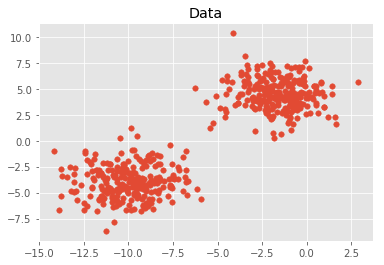

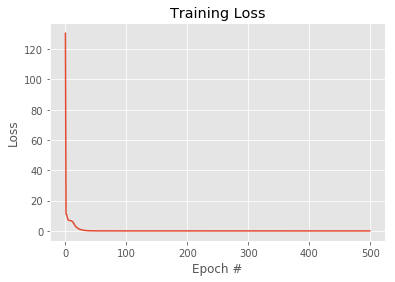

In [2]:
# Evaluate the model
print('[INFO]: Evaluating....')
predictions = predict(test_x, w)
print(classification_report(test_y, predictions))

# Plot the classification (test) data
plt.style.use('ggplot')
plt.figure()
plt.title('Data')
plt.scatter(test_x[:, 0], test_x[:, 1], marker='o', s=30)

# Plot the loss over time
plt.style.use('ggplot')
plt.figure()
plt.title('Training Loss')
plt.plot(np.arange(0, 500), losses)
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.show()